# Analyzing the factor that affect gold price

Factors Affecting Gold Prices

1.Demand and Supply:
 If the demand for gold increases, the price increases since the supply is relatively scarce

2.Inflation

3.Central Bank of India

4.Interest rates:
  Both gold and interest rates have an inverse relationship. When the interest rates increase, people sell off their gold and use the money to earn high interest. When the interest rates decrease, people buy more gold resulting in increase in demand.
5.Monsoon:
 Rural demand plays an important role in demand for gold; the maximum purchase of gold in India is done from rural market. Good   monsoon results in good harvest and the amount earned is used to invest in gold which is used in rainy season as in poor      monsoon gold acts as a safe haven.
 
6.Import Duty:
As gold is not produced in India, it is important for consumption from other countries and import duty plays a crucial role in price fluctuations.

7.Indian Jewellery market:
For every Indian household, gold acts as an integral part. Wedding, festivals are incomplete without gold purchase. Therefore, during this season the demand for it increases and resulting in an increase in price.

8.Government Reserves:
The government holds reserves of gold. When RBI starts to buy greater quantity than it sells, the price increases as it will result in insufficient supply of gold and vice versa.

9.Currency fluctuations:
As gold is traded on the international market in US dollars, therefore, when US dollars are converted to Indian rupees during import, the price fluctuates. If the Indian rupee depreciates, gold import turns to be costlier.

10.Protection from volatility or uncertainty:
To protect from uncertainties, people wish to invest or buy gold as it is a safe commodity.

11.Correlation with other assets:
Gold is a highly effective portfolio diversification because of its low negative correlation with all the major asset classes. When shares of companies fall there is an inverse relationship shown between gold and equities.

12.Geopolitical factors

13.Future gold demand

## In this analysis, impact of Inflation rate, value of gold as per US dollar,and Return on investment on the gold price over the year(1960-2020).

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

### 1.Importing 2 files

In [40]:
dr= pd.read_csv('gold_price.csv')
df= pd.read_csv('rupee.csv')

### 2. Droping common attribute 

In [41]:
dx=df.drop(columns='Year')

       ### add new column
       #df.insert(2,column="name", value='1')
      


### 3.merging two table

In [42]:
data=pd.merge(df,dr)
print(data)
data

    Year  Rs/$100  inflation_rate   Rs(24k)
0   1960   100.00            1.78    111.87
1   1961   101.70            1.70    119.35
2   1962   105.39            3.63    119.75
3   1963   108.49            2.95     97.00
4   1964   122.98           13.36     63.25
..   ...      ...             ...       ...
56  2016  6139.78            4.95  28623.50
57  2017  6344.12            3.33  29667.50
58  2018  6594.40            3.95  31438.00
59  2019  6839.93            3.72  35220.00
60  2020  7292.97            6.62  48651.00

[61 rows x 4 columns]


,Year,Rs/$100,inflation_rate,Rs(24k)
0,1960,100.00,1.78,111.87
1,1961,101.70,1.70,119.35
2,1962,105.39,3.63,119.75
3,1963,108.49,2.95,97.00
4,1964,122.98,13.36,63.25
...,...,...,...,...
56,2016,6139.78,4.95,28623.50
57,2017,6344.12,3.33,29667.50
58,2018,6594.40,3.95,31438.00
59,2019,6839.93,3.72,35220.00


**Rs/$100= value of rupee per 100 dollar,
**Rs(24k)= Value of gold per 10g

### 4.Shape of the table

In [43]:
data.shape

(61, 4)

### 5. converting 24k to 22k 
    And converting Rs/$100 to Rs/$

In [44]:
data['Rs(22k)'] = data['Rs(24k)']*(22/24)
data['Rs/$'] = data['Rs/$100']/100
round(data)

,Year,Rs/$100,inflation_rate,Rs(24k),Rs(22k),Rs/$
0,1960,100.0,2.0,112.0,103.0,1.0
1,1961,102.0,2.0,119.0,109.0,1.0
2,1962,105.0,4.0,120.0,110.0,1.0
3,1963,108.0,3.0,97.0,89.0,1.0
4,1964,123.0,13.0,63.0,58.0,1.0
...,...,...,...,...,...,...
56,2016,6140.0,5.0,28624.0,26238.0,61.0
57,2017,6344.0,3.0,29668.0,27195.0,63.0
58,2018,6594.0,4.0,31438.0,28818.0,66.0
59,2019,6840.0,4.0,35220.0,32285.0,68.0


**Rs/$= value of Rs per dollar

### 6. Return of investment

In [46]:
data['ROI%'] = ((data['Rs(24k)']/data['Rs(24k)'].shift(1))-1)*100


### 7.Basic statistical details

In [47]:
round(data.describe())

,Year,Rs/$100,inflation_rate,Rs(24k),Rs(22k),Rs/$,ROI%
count,61.0,61.0,61.0,61.0,61.0,61.0,60.0
mean,1990.0,1870.0,7.0,7896.0,7238.0,19.0,12.0
std,18.0,2071.0,5.0,11415.0,10464.0,21.0,19.0
min,1960.0,100.0,-8.0,63.0,58.0,1.0,-35.0
25%,1975.0,300.0,4.0,486.0,446.0,3.0,2.0
50%,1990.0,908.0,7.0,3200.0,2933.0,9.0,9.0
75%,2005.0,2613.0,10.0,7000.0,6417.0,26.0,20.0
max,2020.0,7293.0,29.0,48651.0,44597.0,73.0,82.0


### 8.Gold rate trend

<AxesSubplot:xlabel='Rs(24k)', ylabel='Year'>

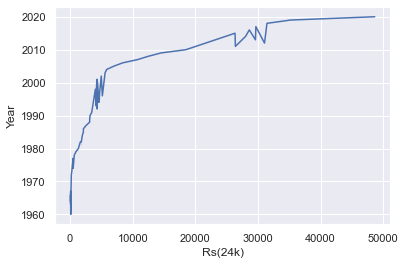

In [103]:
sns.lineplot(x=data['Rs(24k)'],y=data['Year'])

### 9. Correlation between various factor through heatmap 

In [50]:
fg= data[['Rs(22k)', 'Rs/$']]
fg.isnull().sum()

Rs(22k)    0
Rs/$       0
dtype: int64

<AxesSubplot:>

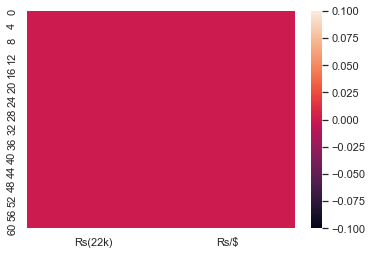

In [51]:
sns.heatmap(fg.isnull())

<AxesSubplot:>

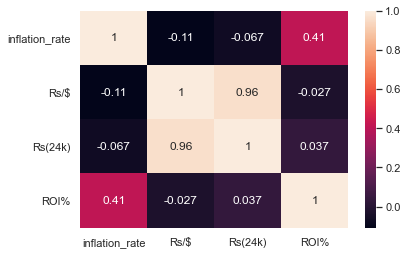

In [107]:
sns.heatmap(data[['inflation_rate','Rs/$', 'Rs(24k)','ROI%']].corr(), annot=True)

value(0,1) shows directly propostional,  
value(-1,0) shows  inversely proportional,  
value 0 no linear relationship

### 10. Return on investment, inflation rate and value of rupee per dollar variation

<AxesSubplot:ylabel='Density'>

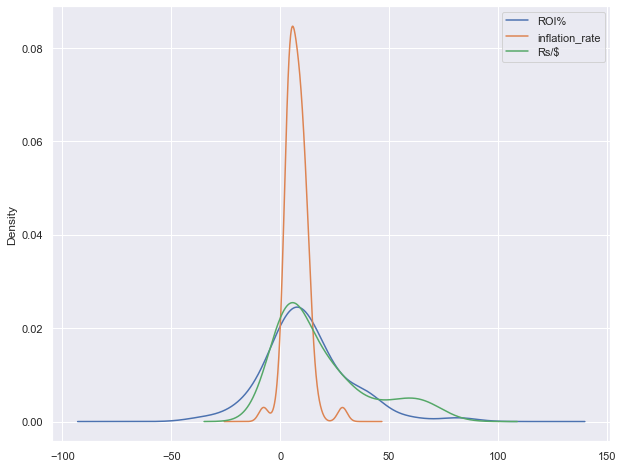

In [54]:
fig= data[['ROI%','inflation_rate','Rs/$']]
fig.plot(kind='kde', figsize=(10,8))

#### When there is a rise in inflation in the country, the value of rupee goes down and people save money in the form of gold. Therefore, if a high level of inflation sustains over a long period of time, then gold becomes an instrument to hedge against inflationary factors when gold prices go up

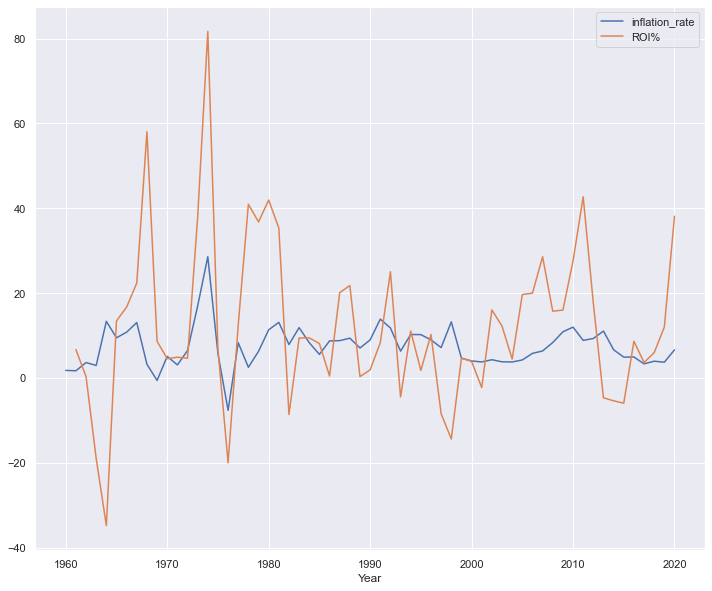

In [79]:
data.plot(x='Year', y=['inflation_rate', 'ROI%'],figsize= (12,10))
plt.legend()
plt.show()

#### fairly dependent factor apart from moment like sino-indian war(1962),liberalisation(1991),2008 economic crisis,etc

### 11. Price of gold depends on change in value of rupee as per dollar

<AxesSubplot:>

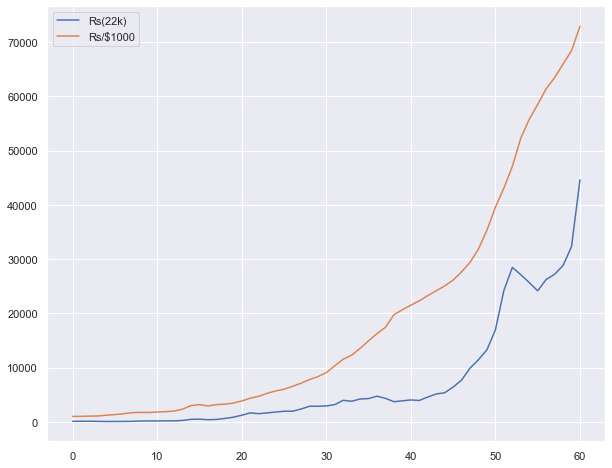

In [97]:
data['Rs/$1000']=data['Rs/$100']*10 #converting value of rupee to see the precise effect on gold price
fig= data[['Rs(22k)','Rs/$1000']]
fig.plot(kind='line', figsize=(10,8))

<AxesSubplot:ylabel='Density'>

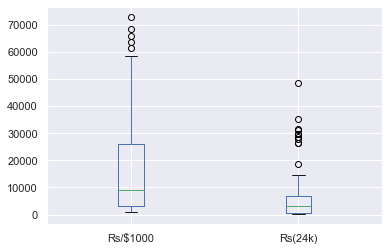

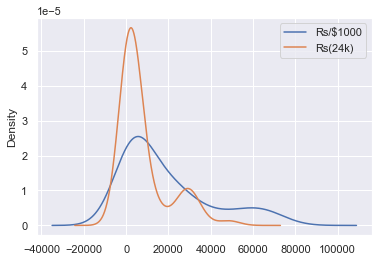

In [113]:
data[['Rs/$1000','Rs(24k)']].plot(kind='box')
data[['Rs/$1000','Rs(24k)']].plot(kind='kde')

<AxesSubplot:xlabel='Year'>

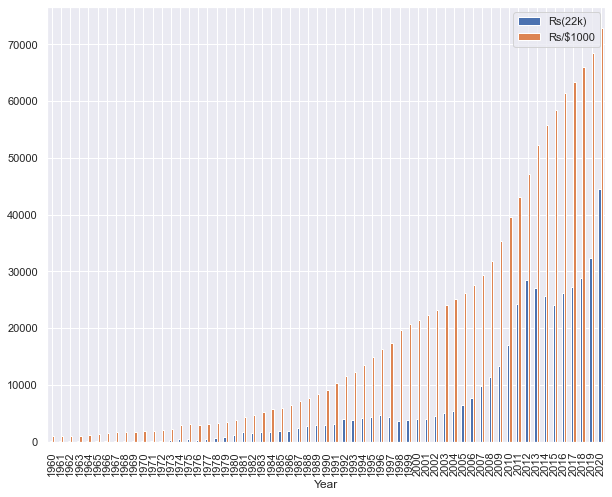

In [98]:
data.plot(y=['Rs(22k)','Rs/$1000'],x='Year',kind='bar',figsize=(10,8))

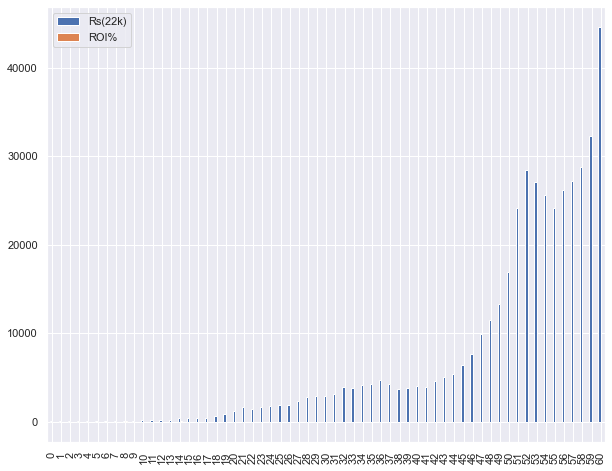

In [58]:
fig= data[['Rs(22k)','ROI%']]
fig.plot(kind='bar', figsize=(10,8))
plt.show()

### 12. Inflation rate effect on price of gold

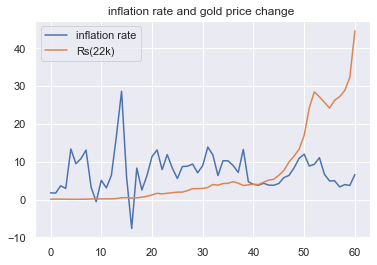

In [62]:
data['price_mg']=data['Rs(22k)']/1000
data['inflation_rate'].plot(label='inflation rate')
data['price_mg'].plot(label='Rs(22k)')
plt.legend()
plt.title('inflation rate and gold price change ')
plt.show()

<AxesSubplot:xlabel='rx'>

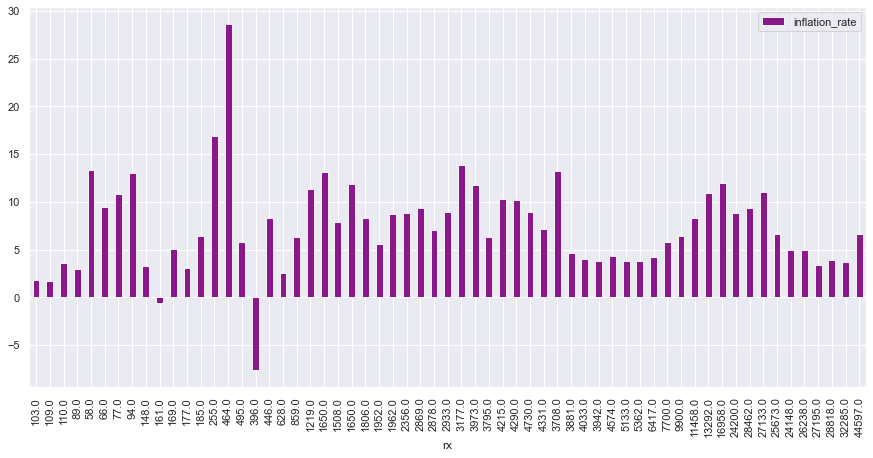

In [90]:
data['rx']=round(data['Rs(22k)'])
data.plot(x='rx',y='inflation_rate',kind='bar',alpha=0.9,color='purple',figsize=(15,7))

#### when the inflation is high, the demand for gold increases and vice versa. The price of gold will then shoot up as a result of high demand from customers. This holds true for both international inflation as well as that which occurs in India.